### ***Problem03***
---

In [52]:
### Import library & data set
# library
from google.colab import drive
drive.mount("/content/drive")
import sys
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# MNIST
mnist = load_digits()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
"""
Run Kmenas on mnist data
PCA3까지의 열을 plot으로 그려라
"""

In [2]:
### (A)
# data set
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.3, random_state=22)
# model (K-means)
kmeans = KMeans(n_clusters=10, random_state=22, n_init="auto")
model_kmeans = kmeans.fit(X_train, y_train)
model_kmeans.labels_

array([5, 2, 2, ..., 0, 5, 8], dtype=int32)

In [ ]:
### (B)
# PCA data
pca = PCA(n_components=25)
X_train = pca.fit_transform(X_train)
print("Implemnet PCA:", X_train.shape)

Implemnet PCA: (1257, 25)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


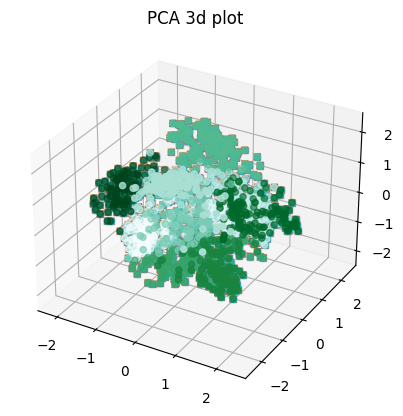

In [61]:
### (C)
# 3 components
pca = PCA(n_components=3)
X_train = pd.DataFrame(pca.fit_transform(X_train))
y_train = pd.DataFrame(y_train, columns=["y_true"])
# classify logistic
l2_clf = LogisticRegression(random_state=22,penalty="l2",n_jobs=-1).fit(X_train,y_train)
y_pred_train = pd.DataFrame(l2_clf.predict(X_train), columns=["y"])
df = pd.concat([X_train, y_pred_train, y_train], axis=1)
# 3d plot
fig = plt.figure()
ax = plt.axes(projection="3d")
xdata = df[0]
ydata = df[2]
zdata = df[1]
# true label shape
ax.scatter(xdata, ydata, zdata, data=df["y_true"]==0, marker="x")
ax.scatter(xdata, ydata, zdata, data=df["y_true"]==1, marker="v")
ax.scatter(xdata, ydata, zdata, data=df["y_true"]==2, marker=".")
ax.scatter(xdata, ydata, zdata, data=df["y_true"]==3, marker="^")
ax.scatter(xdata, ydata, zdata, data=df["y_true"]==4, marker="<")
ax.scatter(xdata, ydata, zdata, data=df["y_true"]==5, marker="3")
ax.scatter(xdata, ydata, zdata, data=df["y_true"]==6, marker="4")
ax.scatter(xdata, ydata, zdata, data=df["y_true"]==7, marker="s")
ax.scatter(xdata, ydata, zdata, data=df["y_true"]==8, marker="p")
ax.scatter(xdata, ydata, zdata, data=df["y_true"]==9, marker="P")
# last step of plot
ax.scatter3D(xdata, ydata, zdata,data=df["y"] , c=df["y"], cmap="BuGn_r")
plt.title("PCA 3d plot")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


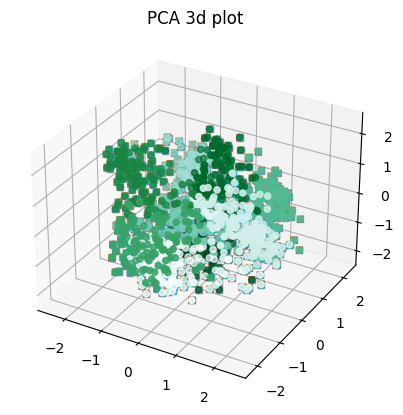

In [62]:
### (D)
# 3 components
pca = PCA(n_components=3, svd_solver='randomized', whiten=True)
X_train = pd.DataFrame(pca.fit_transform(X_train))
y_train = pd.DataFrame(y_train, columns=["y_true"])
# classify logistic
l2_clf = LogisticRegression(random_state=22,penalty="l2",n_jobs=-1).fit(X_train,y_train)
y_pred_train = pd.DataFrame(l2_clf.predict(X_train), columns=["y"])
df = pd.concat([X_train, y_pred_train, y_train], axis=1)
# 3d plot
fig = plt.figure()
ax = plt.axes(projection="3d")
xdata = df[0]
ydata = df[2]
zdata = df[1]
# true label shape
ax.scatter(xdata, ydata, zdata, data=df["y_true"]==0, marker="x")
ax.scatter(xdata, ydata, zdata, data=df["y_true"]==1, marker="v")
ax.scatter(xdata, ydata, zdata, data=df["y_true"]==2, marker=".")
ax.scatter(xdata, ydata, zdata, data=df["y_true"]==3, marker="^")
ax.scatter(xdata, ydata, zdata, data=df["y_true"]==4, marker="<")
ax.scatter(xdata, ydata, zdata, data=df["y_true"]==5, marker="3")
ax.scatter(xdata, ydata, zdata, data=df["y_true"]==6, marker="4")
ax.scatter(xdata, ydata, zdata, data=df["y_true"]==7, marker="s")
ax.scatter(xdata, ydata, zdata, data=df["y_true"]==8, marker="p")
ax.scatter(xdata, ydata, zdata, data=df["y_true"]==9, marker="P")
# last step of plot
ax.scatter3D(xdata, ydata, zdata,data=df["y"] , c=df["y"], cmap="BuGn_r")
plt.title("PCA 3d plot")
plt.show()